# ROC and AUC Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2]:
y_test_pred = classifier.predict(X_test)

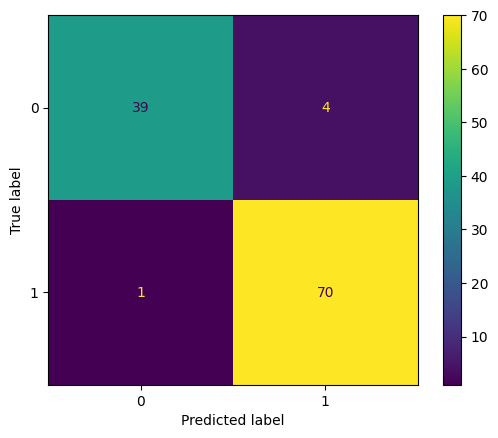

In [3]:
CM = confusion_matrix(y_test, y_test_pred)
CM_disp = ConfusionMatrixDisplay(confusion_matrix=CM)
CM_disp.plot()

In [4]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



![cm](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)

In [5]:

# Predict probabilities for the test set
probs = classifier.predict_proba(X_test)
probs_positive = probs[:, 1]  # probabilities of positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs_positive)
roc_auc = auc(fpr, tpr)


![ROC2](https://miro.medium.com/v2/resize:fit:1358/1*Bgc9QOjhnL70g2SQxyj6hQ.png)

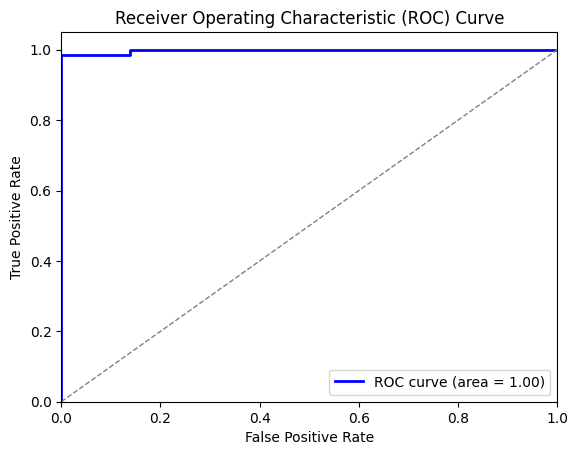

In [6]:

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Explanation:

1. We load the breast cancer dataset using scikit-learn's `load_breast_cancer` function.
2. The dataset is split into training and testing sets using `train_test_split`.
3. We train a logistic regression classifier on the training data.
4. The classifier's probabilities of predicting the positive class are computed using `predict_proba`.
5. We compute the ROC curve and AUC (Area Under the Curve) using `roc_curve` and `auc`.
6. Finally, we plot the ROC curve using Matplotlib.

Interpretation of results:
- The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold settings.
- The area under the ROC curve (AUC) provides a single scalar value summarizing the classifier's performance. AUC closer to 1 indicates better performance, while 0.5 represents a random classifier.

In practice, you would compare the ROC curve and AUC of multiple classifiers to determine which one performs better for your specific task.

Interpretation:

- The ROC curve shows the trade-off between True Positive Rate (TPR, correctly classified setosa) and False Positive Rate (FPR, mistakenly classified as setosa).
- A perfect classifier would have a ROC curve hugging the top left corner, achieving 100% TPR (all setosa correctly identified) with 0% FPR (no mistakes).
- Our AUC score (0-1) represents the area under the ROC curve. A higher score (closer to 1) indicates better classification performance.
- Analyze the curve and AUC score in the context of your specific problem. Here, a high AUC would be desirable for accurately identifying Iris setosa flowers.


> never be below the diagonal line. Maximize TPR. Minimize FPR.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


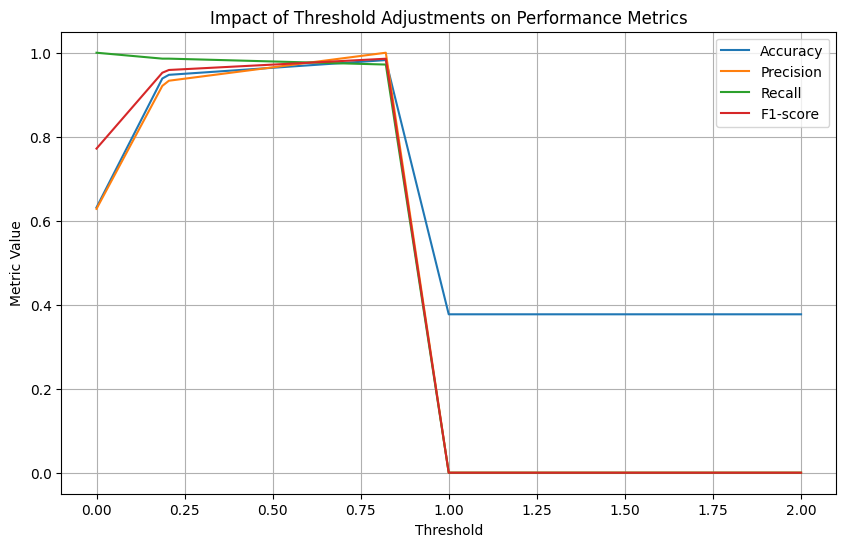

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metric values
thresholds_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Iterate over different threshold values
for threshold in thresholds:
    # Predict labels based on the current threshold
    y_pred = (probs_positive > threshold).astype(int)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metric values to lists
    thresholds_list.append(threshold)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the impact of threshold adjustments on performance metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds_list, accuracy_list, label='Accuracy')
plt.plot(thresholds_list, precision_list, label='Precision')
plt.plot(thresholds_list, recall_list, label='Recall')
plt.plot(thresholds_list, f1_list, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Impact of Threshold Adjustments on Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


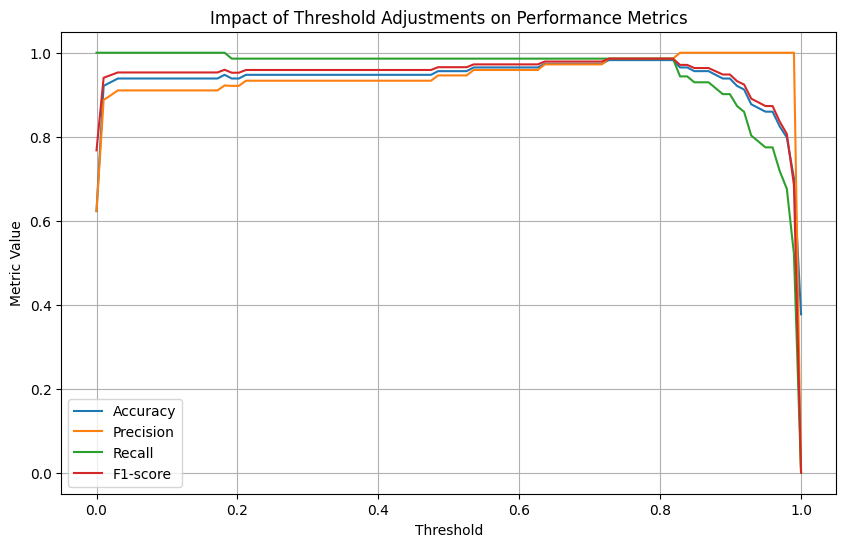

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metric values
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Iterate over different threshold values
for threshold in np.linspace(0, 1, 100):  # Adjust the number of thresholds as needed
    # Predict labels based on the current threshold
    y_pred = (probs_positive > threshold).astype(int)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metric values to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the impact of threshold adjustments on performance metrics
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 1, 100), accuracy_list, label='Accuracy')
plt.plot(np.linspace(0, 1, 100), precision_list, label='Precision')
plt.plot(np.linspace(0, 1, 100), recall_list, label='Recall')
plt.plot(np.linspace(0, 1, 100), f1_list, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Impact of Threshold Adjustments on Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()


To apply the chosen threshold (e.g., 70%) in your model, you can use it to classify predictions based on the predicted probabilities. Any predicted probability greater than or equal to the threshold will be classified as the positive class, and any predicted probability less than the threshold will be classified as the negative class.

Here's how you can apply the threshold to your model predictions:



In [11]:
# Define the chosen threshold
chosen_threshold = 0.7  # You can adjust this threshold as needed

# Predict labels based on the chosen threshold
y_pred_thresholded = (probs_positive >= chosen_threshold).astype(int)

# Evaluate the performance of the thresholded predictions
accuracy_thresholded = accuracy_score(y_test, y_pred_thresholded)
precision_thresholded = precision_score(y_test, y_pred_thresholded)
recall_thresholded = recall_score(y_test, y_pred_thresholded)
f1_thresholded = f1_score(y_test, y_pred_thresholded)

# Print the performance metrics
print("Performance metrics with chosen threshold:")
print("Accuracy:", accuracy_thresholded)
print("Precision:", precision_thresholded)
print("Recall:", recall_thresholded)
print("F1-score:", f1_thresholded)

Performance metrics with chosen threshold:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-score: 0.979020979020979



In this code:

- We define the chosen threshold (`chosen_threshold`) as 0.7 (70%).
- We classify predictions based on whether the predicted probabilities (`probs_positive`) are greater than or equal to the chosen threshold.
- We calculate performance metrics (accuracy, precision, recall, F1-score) for the thresholded predictions using scikit-learn's functions.
- We print the performance metrics to evaluate the model's performance using the chosen threshold.

Adjust the `chosen_threshold` as needed based on your analysis of the ROC curve and the desired trade-offs between sensitivity and specificity.